In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker

# INPUT to CLM5

[-90.         -88.10526316 -86.21052632 -84.31578947 -82.42105263
 -80.52631579 -78.63157895 -76.73684211 -74.84210526 -72.94736842
 -71.05263158 -69.15789474 -67.26315789 -65.36842105 -63.47368421
 -61.57894737 -59.68421053 -57.78947368 -55.89473684 -54.
 -52.10526316 -50.21052632 -48.31578947 -46.42105263 -44.52631579
 -42.63157895 -40.73684211 -38.84210526 -36.94736842 -35.05263158
 -33.15789474 -31.26315789 -29.36842105 -27.47368421 -25.57894737
 -23.68421053 -21.78947368 -19.89473684 -18.         -16.10526316
 -14.21052632 -12.31578947 -10.42105263  -8.52631579  -6.63157895
  -4.73684211  -2.84210526  -0.94736842   0.94736842   2.84210526
   4.73684211   6.63157895   8.52631579  10.42105263  12.31578947
  14.21052632  16.10526316  18.          19.89473684  21.78947368
  23.68421053  25.57894737  27.47368421  29.36842105  31.26315789
  33.15789474  35.05263158  36.94736842  38.84210526  40.73684211
  42.63157895  44.52631579  46.42105263  48.31578947  50.21052632
  52.10526316  54.

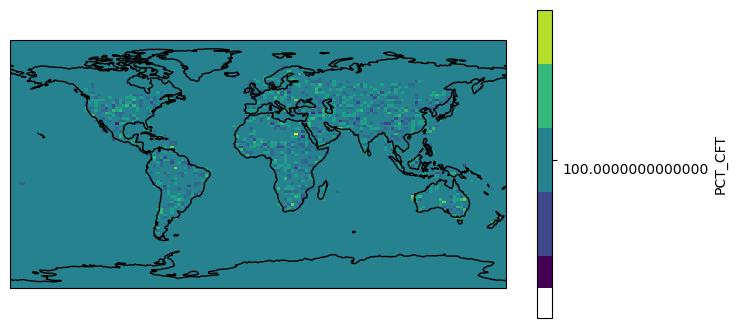

In [16]:
#file = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'
#file = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP1-2.6_78pfts_CMIP6_simyr1850-2100_c190228.nc'
file = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/surfdata_1.9x2.5_78pfts_CMIP6_simyr1850_c170824.nc'
dset = xr.open_dataset(file, decode_times=False)

a=np.multiply(dset['PCT_NAT_PFT'],dset['AREA'])
#a.sel(time=2015).isel(natpft=0).plot()
dset=dset.assign_coords(lsmlat=dset['LATIXY'][:,0].values)
dset=dset.assign_coords(lsmlon=dset['LONGXY'][0,:].values)
#dset['AREA'].plot()
#plt.text(0.8, -0.3, float(np.sum(dset['AREA'])), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig, axs = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_CFT'].sum('cft').plot()
axs.coastlines(linewidth=1)

print(dset['LATIXY'][:,0].values)

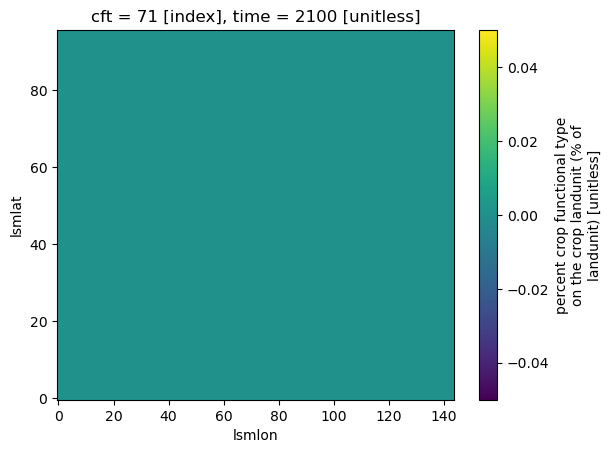

In [4]:
file = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP1-2.6_78pfts_CMIP6_simyr1850-2100_c190228.nc'

dset = xr.open_dataset(file, decode_times=False)
dset['PCT_CFT'].sel(time=2100).isel(cft=56).plot()

# OUTPUT to CLM5

In [43]:
dset['PCT_CFT'].sum(['lsmlat','lsmlon'])

<xarray.DataArray 'PCT_CFT' (time: 251, cft: 64)>
array([[1.09452044e+06, 0.00000000e+00, 1.09612386e+04, ...,
        9.32782426e+02, 3.51646230e+03, 1.04501546e+02],
       [1.09234904e+06, 0.00000000e+00, 1.09818551e+04, ...,
        9.33120710e+02, 3.51844449e+03, 1.04800053e+02],
       [1.09234427e+06, 0.00000000e+00, 1.09900090e+04, ...,
        9.33189225e+02, 3.52037037e+03, 1.05061006e+02],
       ...,
       [1.08232140e+06, 0.00000000e+00, 9.39776061e+03, ...,
        1.54494966e+03, 2.25627767e+03, 2.36053759e+02],
       [1.08273213e+06, 0.00000000e+00, 9.38669483e+03, ...,
        1.55518336e+03, 2.24806595e+03, 2.36122388e+02],
       [1.08283427e+06, 0.00000000e+00, 9.36855833e+03, ...,
        1.57005459e+03, 2.24074344e+03, 2.36467084e+02]])
Coordinates:
  * cft      (cft) int32 15 16 17 18 19 20 21 22 23 ... 71 72 73 74 75 76 77 78
  * time     (time) int32 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100

In [5]:
a=dset['PCT_CFT'].sum(['lsmlat','lsmlon'])
nonzero_index = np.argwhere(a.values != 0)
zero_index = np.argwhere(a.values == 0)
print(nonzero_index[-10:])

[[250  50]
 [250  51]
 [250  52]
 [250  53]
 [250  54]
 [250  55]
 [250  60]
 [250  61]
 [250  62]
 [250  63]]


In [45]:
a.isel(cft=56)

<xarray.DataArray 'PCT_CFT' (time: 251)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
    cft      int32 71
  * time     (time) int32 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100

In [2]:

#list_files2 = ["/cluster/work/users/a2021/archive/NSSP534frc2esmSP_f19_tn14_07022023/lnd/hist/NSSP534frc2esmSP_f19_tn14_07022023.clm2.h0.2015-01.nc"]
list_files2 = ["/cluster/work/users/a2021/archive/NSSP534frc2esmSP_f19_tn14_07022023/lnd/hist/NSSP534frc2esmSP_f19_tn14_07022023.clm2.h0.2015-01.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
#b=np.multiply(dset_case2['PCT_NAT_PFT'][0,0,:,:],dset_case2['area']).plot()

dset_case2=dset_case2.assign_coords(lat=dset['LATIXY'][:,0].values) # changing the lat lon names and values of output variable to input variables
dset_case2=dset_case2.assign_coords(lon=dset['LONGXY'][0,:].values)
dset_case2 = dset_case2.rename({'lat': 'lsmlat', 'lon': 'lsmlon'})

#plt.text(0.8, -0.3, float(np.sum(dset_case2['area'])), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);

PFT_gridcell_in=np.multiply((dset['PCT_NAT_PFT']/100), ((dset_case2['PCT_LANDUNIT']/100).isel(time=0).isel(ltype=0)))
PFT_gridcell_out=np.multiply((dset_case2['PCT_NAT_PFT']/100), ((dset_case2['PCT_LANDUNIT']/100).isel(time=0).isel(ltype=0)))
PFT_gridcell_areafraction_in = np.multiply(PFT_gridcell_in, dset['AREA']) # converting to area fraction
PFT_gridcell_areafraction_out = np.multiply(PFT_gridcell_out, dset_case2['area']) # converting to area fraction
PFT_gridcell_areafraction_sum_in = PFT_gridcell_areafraction_in.sum(['lsmlat','lsmlon'])
PFT_gridcell_areafraction_sum_out = PFT_gridcell_areafraction_out.sum(['lsmlat','lsmlon'])
dset_case2['PCT_LANDUNIT']
#print((PFT_gridcell_areafraction_in.sel(time=2015).sum())-PFT_gridcell_areafraction_out.sum())
dset_case2


FileNotFoundError: [Errno 2] No such file or directory: b'/cluster/work/users/a2021/archive/NSSP534frc2esmSP_f19_tn14_07022023/lnd/hist/NSSP534frc2esmSP_f19_tn14_07022023.clm2.h0.2015-01.nc'

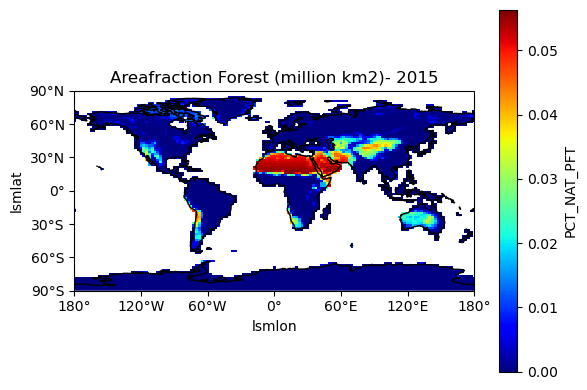

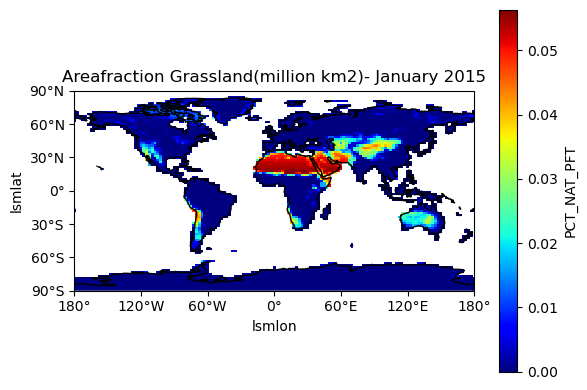

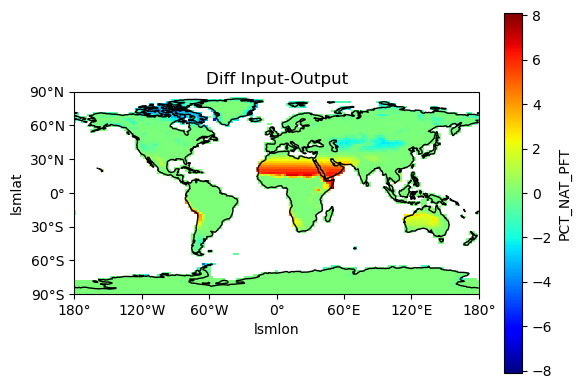

In [18]:
#From one month input, year 2015
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(dset['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')).sel(time=2015).plot(cmap='jet')          #percent
#a=((PFT_gridcell_areafraction_in.isel(natpft=slice(1,11)).sum(dim='natpft')).sel(time=2015)/1e6)           #forest
#a=((PFT_gridcell_areafraction_in.isel(natpft=slice(12,14)).sum(dim='natpft')).sel(time=2015)/1e6)          #grassland
a=((PFT_gridcell_areafraction_in.isel(natpft=0)).sel(time=2015)/1e6)
a.plot(cmap='jet')    #areafraction
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction Forest (million km2)- 2015', fontsize=12, loc='center')      
fig.tight_layout()

plt.show()

#From one month output, January 2015
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(dset_case2['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')).plot(cmap='jet')               #percent
#b=((PFT_gridcell_areafraction_out.isel(natpft=slice(1,11)).sum(dim='natpft'))/1e6)                     #forest
b=((PFT_gridcell_areafraction_out.isel(natpft=0))/1e6)                      #grassland
b.plot(cmap='jet')              #areafraction
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction Grassland(million km2)- January 2015', fontsize=12, loc='center') 
#plt.text(0.8, -0.3, float((np.sum((dset_case2['PCT_NAT_PFT'][:,2:11].sum(dim='natpft')))/(np.sum(dset_case2['area'])))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig.tight_layout()


fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(dset_case2['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')).plot(cmap='jet')               #percent
((a-b)*1e6).plot(cmap='jet')              #areafraction
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Diff Input-Output', fontsize=12, loc='center') 
#plt.text(0.8, -0.3, float((np.sum((dset_case2['PCT_NAT_PFT'][:,2:11].sum(dim='natpft')))/(np.sum(dset_case2['area'])))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig.tight_layout()



In [12]:
a=dset_case2['PCT_CFT'].sum(['lsmlat','lsmlon'])
nonzero_index = np.argwhere(a.values != 0)
print(nonzero_index)
#print(len(nonzero_index))

[[ 0  0]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 0  5]
 [ 0  8]
 [ 0  9]
 [ 0 26]
 [ 0 27]
 [ 0 46]
 [ 0 47]
 [ 0 52]
 [ 0 53]
 [ 0 60]
 [ 0 61]
 [ 0 62]
 [ 0 63]]


In [22]:
#print(dset['PCT_CFT'].sum())
#print(dset['PCT_NAT_PFT'].sum())
a=dset['PCT_CFT'].sum(['lsmlat','lsmlon']).sel(time=2015)
nonzero_index = np.argwhere(a.values != 0)
#print(len(nonzero_index))

[[<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: > <GeoAxesSubplot: >]]

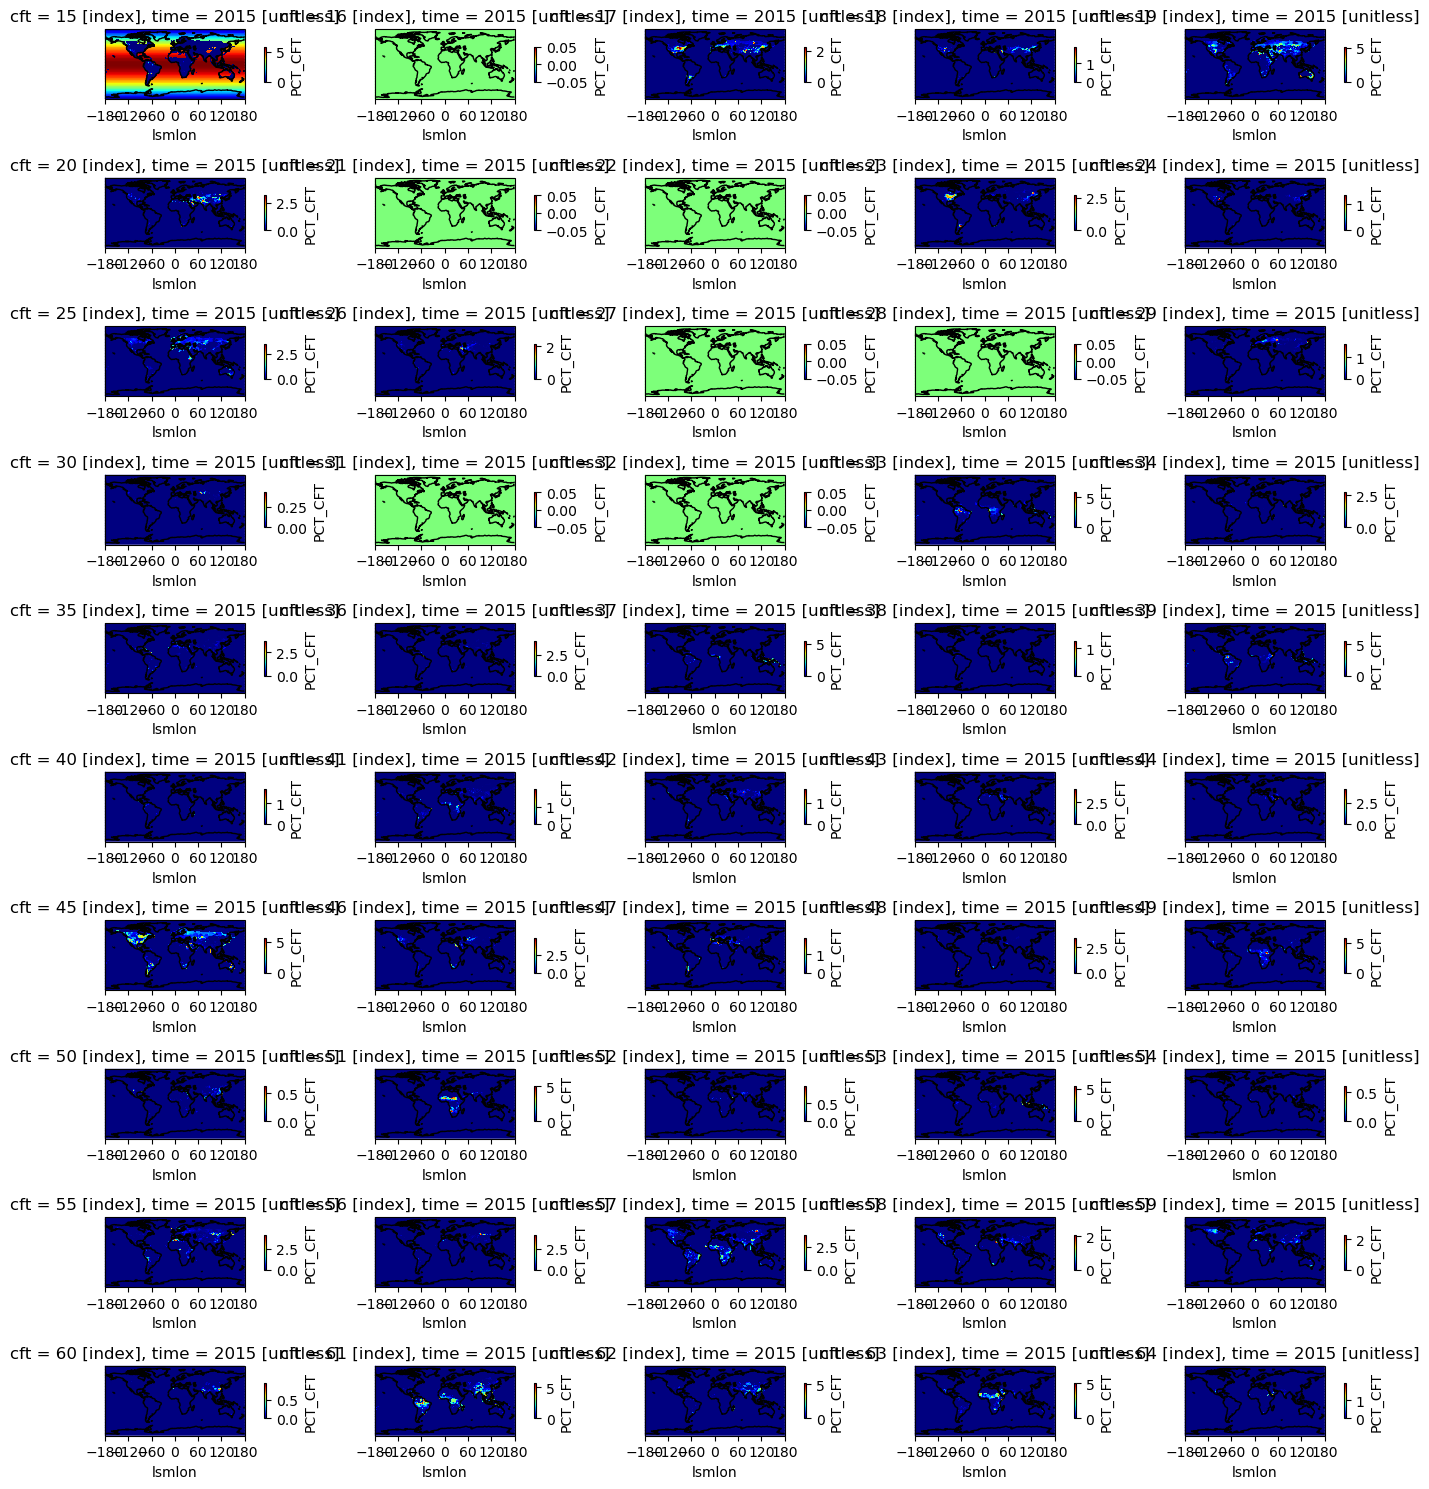

In [65]:
CFT_areafraction = np.multiply(dset['PCT_CFT'], dset['AREA'])
a=CFT_areafraction.sum(['lsmlat','lsmlon']).sel(time=2015)
nonzero_index = np.argwhere(a.values != 0)

#print(len(nonzero_index))
#Itype=['c3_crop','crop','temperate_corn', 'irrigated_temperate_corn','spring_wheat','irrigated_spring_wheat','temperate_soybean', 'irrigated_temperate_soybean', 'cotton','irrigated_cotton','rice', 'irrigated rice','sugarcane','irrigated sugarcane', 'tropical_corn ', 'irrigated_tropical_corn','tropical_soybean','irrigated_tropical_soybean']


#for k in range(len(Itype)): 
fig, axs = plt.subplots(10,5, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()},sharex=True, sharey=True)
print(axs)
axs = axs.flatten()
for i in range(len(nonzero_index)-3):
    #fig, axs = plt.subplots(figsize=(4,4), subplot_kw={'projection': ccrs.PlateCarree()})
    (CFT_areafraction.sel(time=2015).isel(cft=i)/1e6).plot(ax=axs[i], transform=ccrs.PlateCarree(),
                                cbar_kwargs={'shrink': 0.5}, cmap='jet')
    axs[i].coastlines(linewidth=1)
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    #lon_formatter = cticker.LongitudeFormatter()
    #axs[i].xaxis.set_major_formatter(lon_formatter)
    #axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    #lat_formatter = cticker.LatitudeFormatter()
    #axs[i].yaxis.set_major_formatter(lat_formatter) 
    #axs[i].set_title( Itype[i], fontsize=11, loc='center') 
    #plt.text(0.8, -0.3, float(np.sum(np.multiply((variables['PCT_LANDUNIT']).isel(ltype=i), area_grid)/np.sum(area_grid))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
    fig.tight_layout()


<xarray.DataArray 'PCT_NAT_PFT' (time: 1)>
array([50964901.62760195])
Coordinates:
  * time     (time) float64 31.0
<xarray.DataArray 'PCT_NAT_PFT' ()>
array(50965958.86068247)
Coordinates:
    time     int32 2015


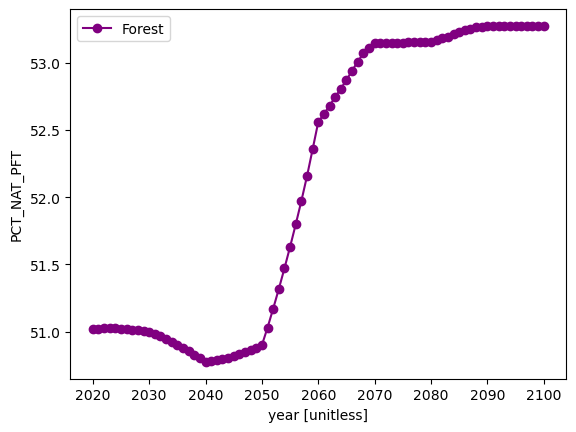

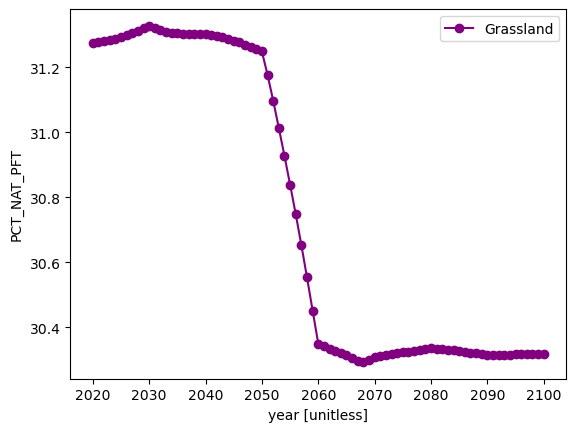

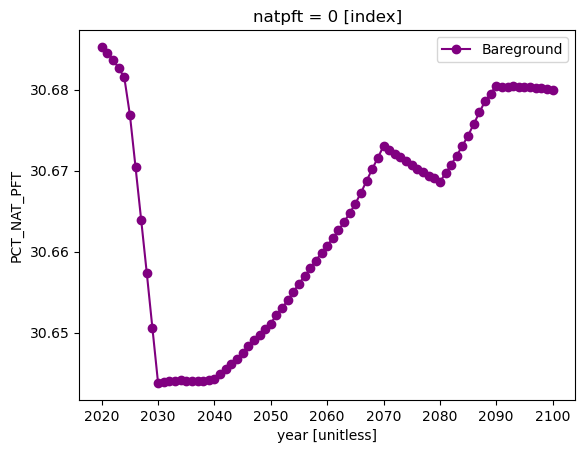

In [10]:

start_time = '2020'
end_time = '2100'

#var_sel = var.sel(time=slice(start_time, end_time))
Bareground=PFT_gridcell_areafraction_sum_in.isel(natpft=0)
Forest=PFT_gridcell_areafraction_sum_in[:,1:11].sum(dim='natpft')
Forest_out=PFT_gridcell_areafraction_sum_out[:,1:11].sum(dim='natpft')
Grassland=PFT_gridcell_areafraction_sum_in[:,12:14].sum(dim='natpft')
print(Forest_out)
print(Forest.sel(time=2015))

(Forest/1e6).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='Forest')
plt.legend()
plt.show()
(Grassland/1e6).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='Grassland')
plt.legend()
plt.show()
(Bareground/1e6).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='Bareground')
plt.legend()
plt.show()


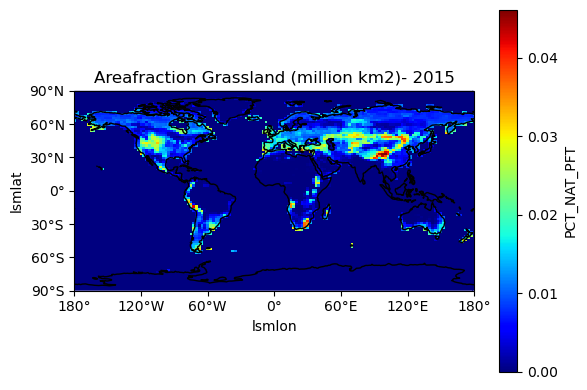

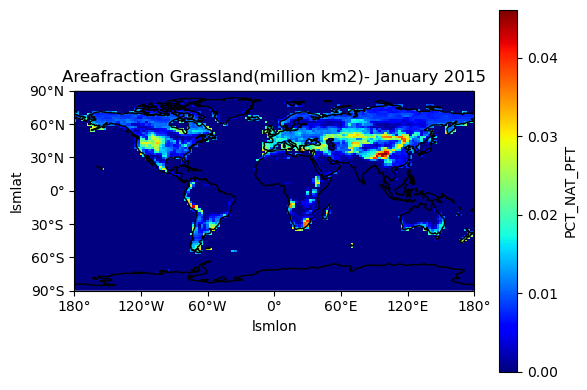

In [34]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
((PCT_NAT_PFT_aeafraction_in.isel(natpft=slice(12,14)).sum(dim='natpft')).sel(time=2015)/1e6).plot(cmap='jet')    #areafraction
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction Grassland (million km2)- 2015', fontsize=12, loc='center')      
fig.tight_layout()

plt.show()

#From one month output, January 2015
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(dset_case2['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')).plot(cmap='jet')               #percent
((PCT_NAT_PFT_aeafraction_out.isel(natpft=slice(12,14)).sum(dim='natpft'))/1e6).plot(cmap='jet')              #areafraction
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction Grassland(million km2)- January 2015', fontsize=12, loc='center') 
#plt.text(0.8, -0.3, float((np.sum((dset_case2['PCT_NAT_PFT'][:,2:11].sum(dim='natpft')))/(np.sum(dset_case2['area'])))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig.tight_layout()

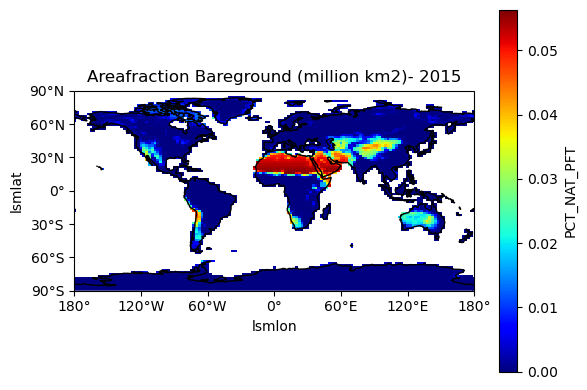

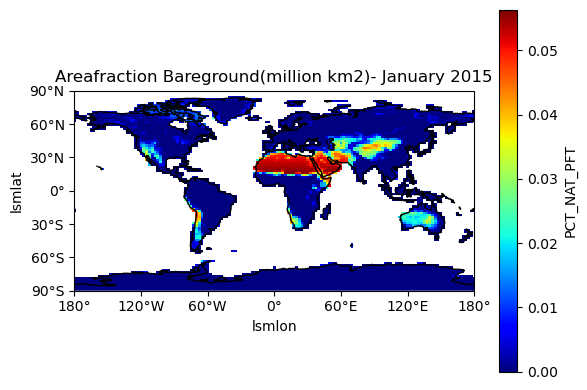

In [36]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
((PCT_NAT_PFT_aeafraction_in.isel(natpft=0)).sel(time=2015)/1e6).plot(cmap='jet')    #areafraction
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction Bareground (million km2)- 2015', fontsize=12, loc='center')      
fig.tight_layout()

plt.show()

#From one month output, January 2015
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(dset_case2['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')).plot(cmap='jet')               #percent
((PCT_NAT_PFT_aeafraction_out.isel(natpft=0))/1e6).plot(cmap='jet')              #areafraction
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction Bareground(million km2)- January 2015', fontsize=12, loc='center') 
#plt.text(0.8, -0.3, float((np.sum((dset_case2['PCT_NAT_PFT'][:,2:11].sum(dim='natpft')))/(np.sum(dset_case2['area'])))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig.tight_layout()

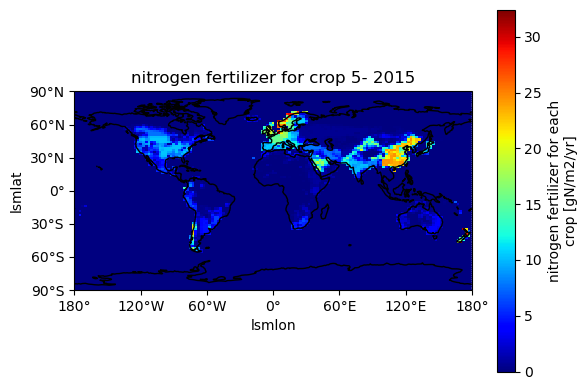

In [38]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(dset_case2['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')).plot(cmap='jet')               #percent
dset['FERTNITRO_CFT'].isel(cft=4).sel(time=2015).plot(cmap='jet')              #areafraction
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('nitrogen fertilizer for crop 5- 2015', fontsize=12, loc='center') 
#plt.text(0.8, -0.3, float((np.sum((dset_case2['PCT_NAT_PFT'][:,2:11].sum(dim='natpft')))/(np.sum(dset_case2['area'])))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig.tight_layout()

In [39]:
dset

<xarray.Dataset>
Dimensions:                  (natpft: 15, cft: 64, lsmlat: 96, lsmlon: 144,
                              time: 251)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1850 1851 1852 1853 ... 2098 2099 2100
  * lsmlat                   (lsmlat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lsmlon                   (lsmlon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
Data variables: (12/22)
    LANDFRAC_PFT             (lsmlat, lsmlon) float64 ...
    PFTDATA_MASK             (lsmlat, lsmlon) int32 ...
    PCT_CROP                 (time, lsmlat, lsmlon) float64 ...
    PCT_CROP_MAX             (lsmlat, lsmlon) float64 ...
    PCT_NAT_PFT              (time, natpft, lsmlat, lsmlon) float64 100.0 ......
    PCT_NAT_PFT_MAX          (natpft, lsmlat, lsmlon) float64 ...
    ...                       ...
    HARVEST_SH2              (time, lsmlat, lsmlon) float64 ...
    HARVEST_SH3              (time, lsmlat, lsmlon) float64 ...
    GRAZING                  (time, lsmlat, lsmlon) float64 ...
    FERTNITRO_CFT            (time, cft, lsmlat, lsmlon) float64 ...
    UNREPRESENTED_PFT_LULCC  (time, natpft, lsmlat, lsmlon) float64 ...
    UNREPRESENTED_CFT_LULCC  (time, cft, lsmlat, lsmlon) float64 ...
Attributes: (12/41)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-28-19 14:03:18
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_agfirepkmon_file:                 map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_gdp_file:                         map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_peatland_file:                    map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_soildepth_file:                   map_5x5min_ORNL-Soil_to_1.9x2.5_nom...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...

In [8]:
dset_case2

<xarray.Dataset>
Dimensions:                  (levgrnd: 25, levlak: 10, levdcmp: 25, time: 1,
                              hist_interval: 2, lsmlon: 144, lsmlat: 96,
                              levsoi: 20, cft: 64, glc_nec: 10, ltype: 9,
                              natpft: 15, nvegwcs: 4)
Coordinates:
  * levgrnd                  (levgrnd) float64 0.01 0.04 0.09 ... 28.87 42.0
  * levlak                   (levlak) float64 0.05 0.6 2.1 ... 25.6 34.33 44.77
  * levdcmp                  (levdcmp) float64 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) float64 31.0
  * lsmlon                   (lsmlon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * lsmlat                   (lsmlat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: hist_interval, levsoi, cft, glc_nec, ltype,
                                natpft, nvegwcs
Data variables: (12/476)
    mcdate                   (time) int32 ...
    mcsec                    (time) int32 ...
    mdcur                    (time) int32 ...
    mscur                    (time) int32 ...
    nstep                    (time) int32 ...
    time_bounds              (time, hist_interval) float64 ...
    ...                       ...
    XSMRPOOL                 (time, lsmlat, lsmlon) float64 ...
    XSMRPOOL_RECOVER         (time, lsmlat, lsmlon) float64 ...
    ZBOT                     (time, lsmlat, lsmlon) float64 ...
    ZWT                      (time, lsmlat, lsmlon) float64 ...
    ZWT_CH4_UNSAT            (time, lsmlat, lsmlon) float64 ...
    ZWT_PERCH                (time, lsmlat, lsmlon) float64 ...
Attributes: (12/100)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 01/24/23 15:54:02
    source:                                    Community Land Model CLM4.0
    hostname:                                  betzy
    ...                                        ...
    cft_irrigated_switchgrass:                 60
    cft_tropical_corn:                         61
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1